
## **Data Loading and Preprocessing**

In [ ]:
install.packages("BiocManager")
BiocManager::install("DESeq2")
BiocManager::install("EnhancedVolcano")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'bit'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudi

In [ ]:
### Load Libraries
library("DESeq2")
library("EnhancedVolcano")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [ ]:
##Load data
data = read.table('/content/GSE249027_Rawcounts.txt', header = TRUE, row.names = 1, sep='\t')
head(data)

,X1_Non_Lesional,X2_Non_Lesional,X3_Non_Lesional,X4_Non_Lesional,X5_Non_Lesional,X6_Non_Lesional,X7_Non_Lesional,X8_Non_Lesional,X9_Non_Lesional,X10_Non_Lesional,⋯,X6_Lesional,X7_Lesional,X8_Lesional,X9_Lesional,X10_Lesional,X11_Lesional,X12_Lesional,X13_Lesional,X14_Lesional,X15_Lesional
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000290825,2,0,1,0,0,0,3,0,0,0,⋯,2,0,2,0,0,0,0,0,0,1
ENSG00000227232,1735,388,722,1095,471,863,694,471,835,469,⋯,258,272,441,669,362,243,331,363,391,541
ENSG00000278267,42,9,28,32,13,24,21,5,8,12,⋯,10,7,1,15,6,8,9,16,11,12
ENSG00000243485,0,1,1,8,3,1,0,2,0,0,⋯,2,0,1,0,0,0,0,2,0,0
ENSG00000237613,0,0,1,0,0,0,4,0,2,1,⋯,0,0,0,0,0,0,0,1,0,0
ENSG00000238009,17,9,3,5,1,4,8,11,4,9,⋯,1,3,9,6,12,6,5,7,4,7


In [ ]:
dim(data)

[1] 30165    30

In [ ]:
# Save the sample name into an object
names_pdx <- colnames(data)
# Create sample annotation corresponding to their phenotypical condition or biological state
meta_classes <- c(rep("Non_Lesional",15), rep("Lesional",15))
# Combine both to a dataframe
meta_data <- data.frame(names_pdx, meta_classes)

# Display the dataframe for verification
meta_data

names_pdx,meta_classes
<chr>,<chr>
X1_Non_Lesional,Non_Lesional
X2_Non_Lesional,Non_Lesional
X3_Non_Lesional,Non_Lesional
X4_Non_Lesional,Non_Lesional
X5_Non_Lesional,Non_Lesional
X6_Non_Lesional,Non_Lesional
X7_Non_Lesional,Non_Lesional
X8_Non_Lesional,Non_Lesional
X9_Non_Lesional,Non_Lesional


In [ ]:
# Assign Control as the reference level (control group) in the meta_data
meta_data$meta_classes <- relevel(factor(meta_data$meta_classes), ref = "Non_Lesional")

## **DESeq2 Analysis**

In [ ]:
ds <- DESeqDataSetFromMatrix(countData = round(data,0),
                             colData = meta_data,
                             design = ~meta_classes)

converting counts to integer mode



In [ ]:
ds

class: DESeqDataSet 
dim: 30165 30 
metadata(1): version
assays(1): counts
rownames(30165): ENSG00000290825 ENSG00000227232 ... ENSG00000278573
  ENSG00000277196
rowData names(0):
colnames(30): X1_Non_Lesional X2_Non_Lesional ... X14_Lesional
  X15_Lesional
colData names(2): names_pdx meta_classes

In [ ]:
# Run Deseq analysis
DS_run <- DESeq(ds)
# Store the results of the analysis
res <- results(DS_run)
# Print out the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 279 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes Lesional vs Non Lesional 
Wald test p-value: meta classes Lesional vs Non Lesional 
DataFrame with 30165 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000290825   0.370611      -0.223068  1.355805 -0.164528 8.69315e-01
ENSG00000227232 570.538862      -0.692184  0.152926 -4.526274 6.00326e-06
ENSG00000278267  16.386874      -0.635187  0.322384 -1.970279 4.88065e-02
ENSG00000243485   0.915285      -1.301606  0.897624 -1.450056 1.47043e-01
ENSG00000237613   0.399679      -1.690015  1.311213 -1.288894 1.97435e-01
...                    ...            ...       ...       ...         ...
ENSG00000278066   25.58276       0.128981  0.142673  0.904032 3.65978e-01
ENSG00000276700   43.70058       0.166245  0.391461  0.424677 6.71072e-01
ENSG00000275757   14.71927       0.672130  0.410080  1.639020 1.01209e-01
ENSG00000278573    9.3062

In [ ]:
# Filter genes with low expression values
ds_filt <- ds[ rowSums(counts(ds)) > 5, ]
# Print the summary of the new DESeq object
ds_filt

class: DESeqDataSet 
dim: 30165 30 
metadata(1): version
assays(1): counts
rownames(30165): ENSG00000290825 ENSG00000227232 ... ENSG00000278573
  ENSG00000277196
rowData names(0):
colnames(30): X1_Non_Lesional X2_Non_Lesional ... X14_Lesional
  X15_Lesional
colData names(2): names_pdx meta_classes

In [ ]:
# Run Deseq2 Analysis
DS_run <- DESeq(ds_filt)
# Store the results of the analysis
res <- results(DS_run)
# Print the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 279 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes Lesional vs Non Lesional 
Wald test p-value: meta classes Lesional vs Non Lesional 
DataFrame with 30165 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000290825   0.370611      -0.223068  1.355805 -0.164528 8.69315e-01
ENSG00000227232 570.538862      -0.692184  0.152926 -4.526274 6.00326e-06
ENSG00000278267  16.386874      -0.635187  0.322384 -1.970279 4.88065e-02
ENSG00000243485   0.915285      -1.301606  0.897624 -1.450056 1.47043e-01
ENSG00000237613   0.399679      -1.690015  1.311213 -1.288894 1.97435e-01
...                    ...            ...       ...       ...         ...
ENSG00000278066   25.58276       0.128981  0.142673  0.904032 3.65978e-01
ENSG00000276700   43.70058       0.166245  0.391461  0.424677 6.71072e-01
ENSG00000275757   14.71927       0.672130  0.410080  1.639020 1.01209e-01
ENSG00000278573    9.3062

In [ ]:
# Sort in ascending order of statistical significance
res[order(res$padj),]

log2 fold change (MLE): meta classes Lesional vs Non Lesional 
Wald test p-value: meta classes Lesional vs Non Lesional 
DataFrame with 30165 rows and 6 columns
                  baseMean log2FoldChange     lfcSE       stat      pvalue
                 <numeric>      <numeric> <numeric>  <numeric>   <numeric>
ENSG00000115919    228.381        3.34728  0.266324    12.5685 3.14733e-36
ENSG00000026751    844.840        4.12899  0.337461    12.2355 2.00961e-34
ENSG00000211592 127214.425        6.88843  0.570327    12.0780 1.37972e-33
ENSG00000244116   1029.562        7.61280  0.641604    11.8652 1.79368e-32
ENSG00000149043   1910.953       -3.13233  0.266423   -11.7570 6.50276e-32
...                    ...            ...       ...        ...         ...
ENSG00000284071   0.393281       0.549438  1.118940  0.4910344    0.623402
ENSG00000279274   0.418773       0.178285  0.983983  0.1811871    0.856221
ENSG00000230819   0.520215       0.847606  1.733214  0.4890372    0.624815
ENSG0000017229

In [ ]:
# total number of genes that are statistically siginicant
sum(res$padj < 0.05, na.rm = TRUE)

[1] 9628

## **Visualization and Annotation**

Warning message in plot.window(...):
“"Main" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in box(...):
“"Main" is not a graphical parameter”
Warning message in title(...):
“"Main" is not a graphical parameter”


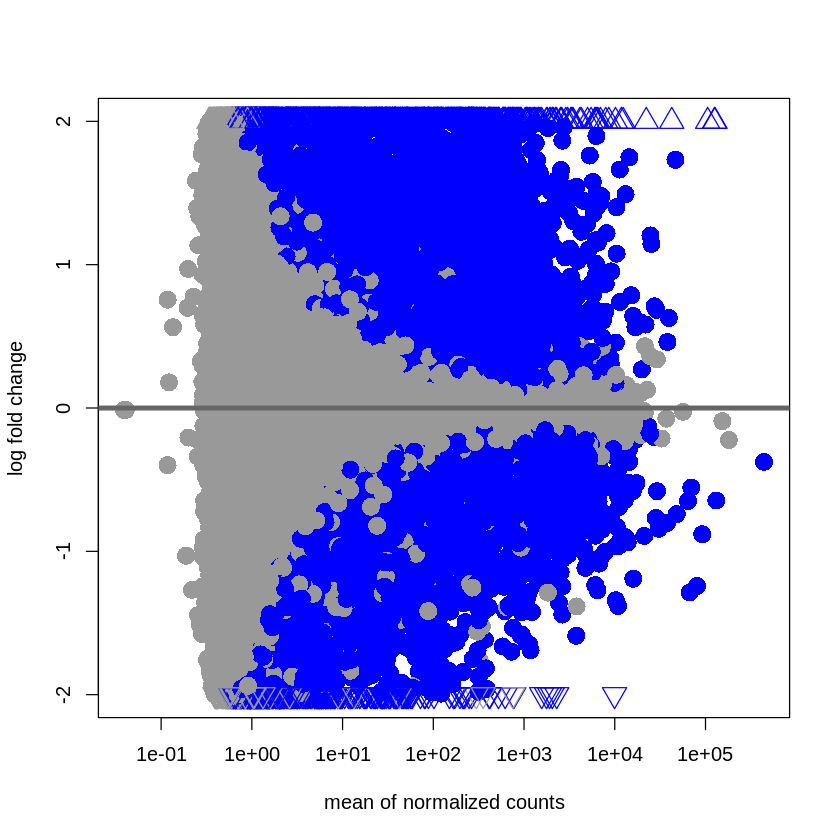

In [ ]:
plotMA(res, Main = "DESeq2", ylim = c(-2,2), cex = 2)

In [ ]:
summary(res$log2FoldChange)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.941756 -0.431558  0.001343  0.136066  0.510164 22.358655 

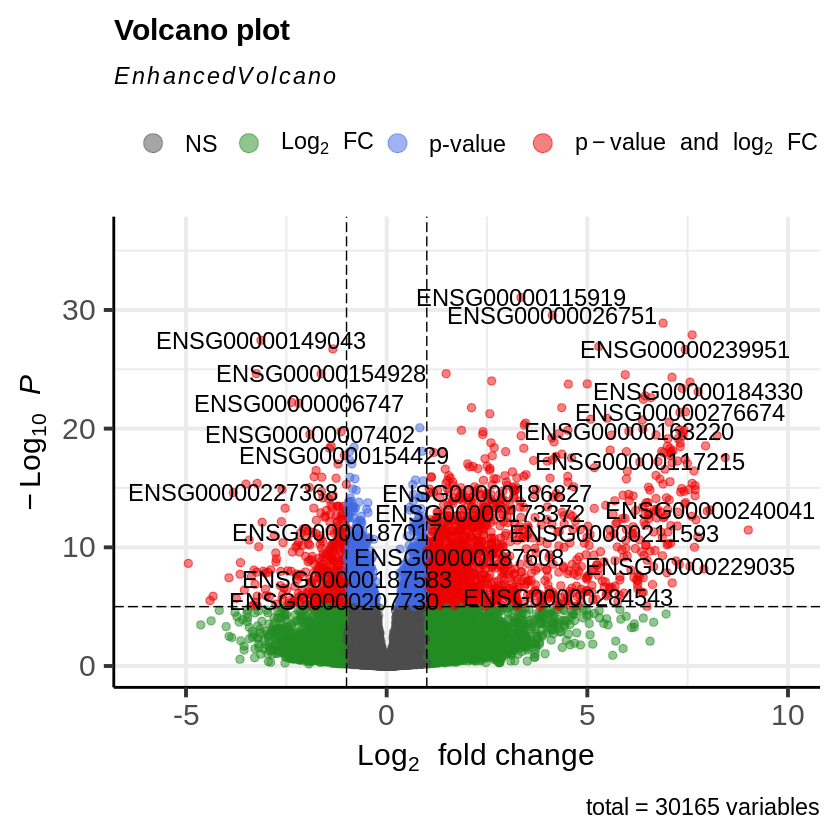

In [ ]:
EnhancedVolcano(res,
                x = 'log2FoldChange',
                y = 'padj',
                lab = rownames(res),
                xlim = c(-6,10))

In [ ]:
write.table(res,"DESeq2_Result.txt", row.names=TRUE,col.names=TRUE, sep="\t", quote=TRUE, append=TRUE)

Warning message in write.table(res, "DESeq2_Result.txt", row.names = TRUE, col.names = TRUE, :
“appending column names to file”


In [ ]:
res

log2 fold change (MLE): meta classes Lesional vs Non Lesional 
Wald test p-value: meta classes Lesional vs Non Lesional 
DataFrame with 30165 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000290825   0.370611      -0.223068  1.355805 -0.164528 8.69315e-01
ENSG00000227232 570.538862      -0.692184  0.152926 -4.526274 6.00326e-06
ENSG00000278267  16.386874      -0.635187  0.322384 -1.970279 4.88065e-02
ENSG00000243485   0.915285      -1.301606  0.897624 -1.450056 1.47043e-01
ENSG00000237613   0.399679      -1.690015  1.311213 -1.288894 1.97435e-01
...                    ...            ...       ...       ...         ...
ENSG00000278066   25.58276       0.128981  0.142673  0.904032 3.65978e-01
ENSG00000276700   43.70058       0.166245  0.391461  0.424677 6.71072e-01
ENSG00000275757   14.71927       0.672130  0.410080  1.639020 1.01209e-01
ENSG00000278573    9.3062

In [ ]:
# Install and load required packages
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
BiocManager::install("org.Hs.eg.db")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'org.Hs.eg.db'

also installing the dependencies ‘plogr’, ‘png’, ‘Biostrings’, ‘RSQLite’, ‘KEGGREST’, ‘AnnotationDbi’


Old packages: 'bit'



In [ ]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi





In [ ]:
BiocManager::install("AnnotationDbi")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'AnnotationDbi'”
Old packages: 'bit'



In [ ]:
library(AnnotationDbi)

In [ ]:
# Filter the DESeq results based on fold change and adjusted p-value
filtered_res <- res[which(res$padj < 0.05 & abs(res$log2FoldChange) > 1), ]

# Get Ensembl IDs from row names of filtered_res
ensembl_ids <- rownames(filtered_res)

# Convert Ensembl IDs to gene symbols using org.Hs.eg.db
gene_symbols <- mapIds(org.Hs.eg.db,
                       keys = ensembl_ids,
                       column = "SYMBOL",
                       keytype = "ENSEMBL",
                       multiVals = "first")

# Remove missing values in gene_symbols
gene_symbols <- gene_symbols[!is.na(gene_symbols)]

# Subset filtered_res to include only genes with valid symbols
filtered_res <- filtered_res[names(gene_symbols), ]

# Replace Ensembl IDs with gene symbols in filtered_res
rownames(filtered_res) <- gene_symbols

'select()' returned 1:many mapping between keys and columns



In [ ]:
# Create a new column in 'res' and fill with NAs
res$gene_symbol <- NA

# Replace NAs with corresponding gene symbols where available
res$gene_symbol[match(names(gene_symbols), rownames(res))] <- gene_symbols

# Save the DESeq results with gene symbols
write.table(res, "DESeq2_Result_with_gene_symbols.txt", row.names = TRUE, col.names = TRUE, sep = "\t", quote = TRUE, append = TRUE)

Warning message in write.table(res, "DESeq2_Result_with_gene_symbols.txt", row.names = TRUE, :
“appending column names to file”


In [ ]:
# Create the volcano plot with gene symbols
volcano_plot <- EnhancedVolcano(filtered_res,
                lab = rownames(filtered_res),
                x = 'log2FoldChange',
                y = 'padj',
                xlim = c(-6, 10))

In [ ]:
ggsave("volcano_plot.png", plot = volcano_plot, dpi = 300, width = 10, height = 8, units = "in")

## **Heatmap Visualization**

In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pheatmap)

In [ ]:
# Load the DESeq2 results from your DESeq2 analysis
# Ensure 'res' is the result from DESeq2 containing log2FoldChange and padj

# Extract the top 10 upregulated and top 10 downregulated genes
# Assuming 'res' is your DESeq2 result object, filter based on log2FoldChange and padj
top_upregulated <- res[order(res$log2FoldChange, decreasing = TRUE), ][1:10, ]
top_downregulated <- res[order(res$log2FoldChange, decreasing = FALSE), ][1:10, ]

# Combine top upregulated and downregulated genes
top_genes <- rbind(top_upregulated, top_downregulated)

# Get the gene names
top_gene_names <- rownames(top_genes)

# Extract expression data for the top genes from your dataset
# Assuming 'data' is your expression matrix from the image you provided
top_genes_expr <- data[top_gene_names, ]

In [ ]:
# Now, create custom sample names based on your dataset's colnames
# Extract original column names
original_colnames <- colnames(data)

In [ ]:
# Create custom names based on the dataset's colnames
custom_sample_names <- ifelse(grepl("Non_Lesional", original_colnames),
                              paste0("Non_Lesional_", seq_along(grep("Lesional", original_colnames))),
                              paste0("Lesional_", seq_along(grep("Lesional", original_colnames))))

In [ ]:
# Assign the new custom names to the colnames of your expression matrix
colnames(data) <- custom_sample_names

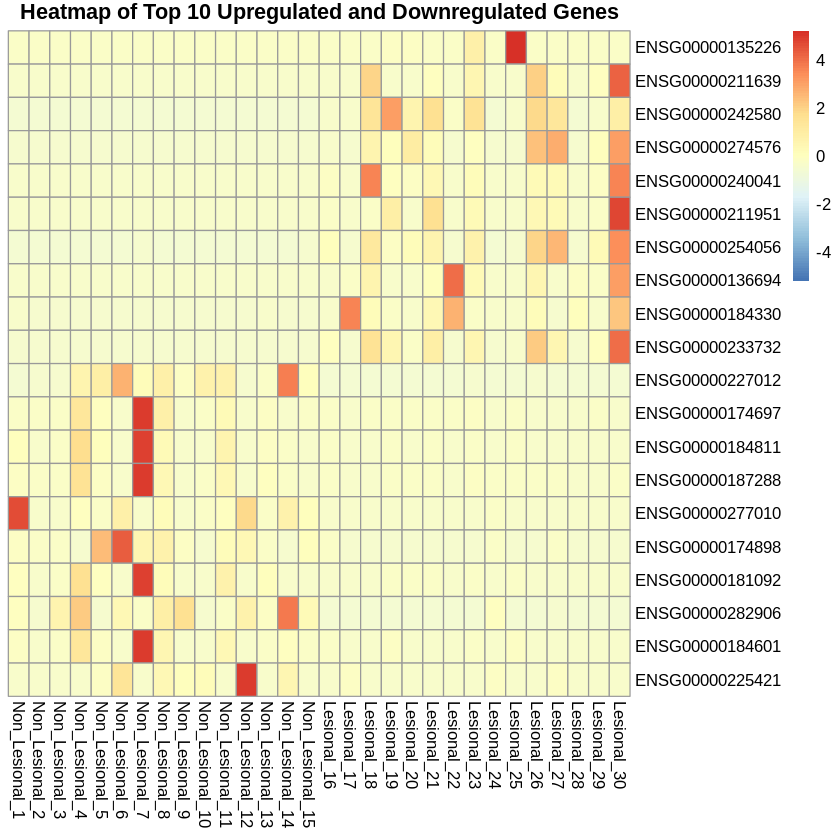

In [ ]:
# Create the heatmap using pheatmap with custom sample names
library(pheatmap)
pheatmap(top_genes_expr,
         scale = "row",              # Scale rows to center gene expression
         cluster_cols = FALSE,       # Disable column clustering (no dendrogram)
         cluster_rows = FALSE,       # Disable row clustering (no dendrogram)
         show_rownames = TRUE,       # Show gene names on y-axis
         show_colnames = TRUE,       # Show custom sample names on x-axis
         main = "Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = colnames(data))  # Use the modified colnames

'select()' returned 1:many mapping between keys and columns



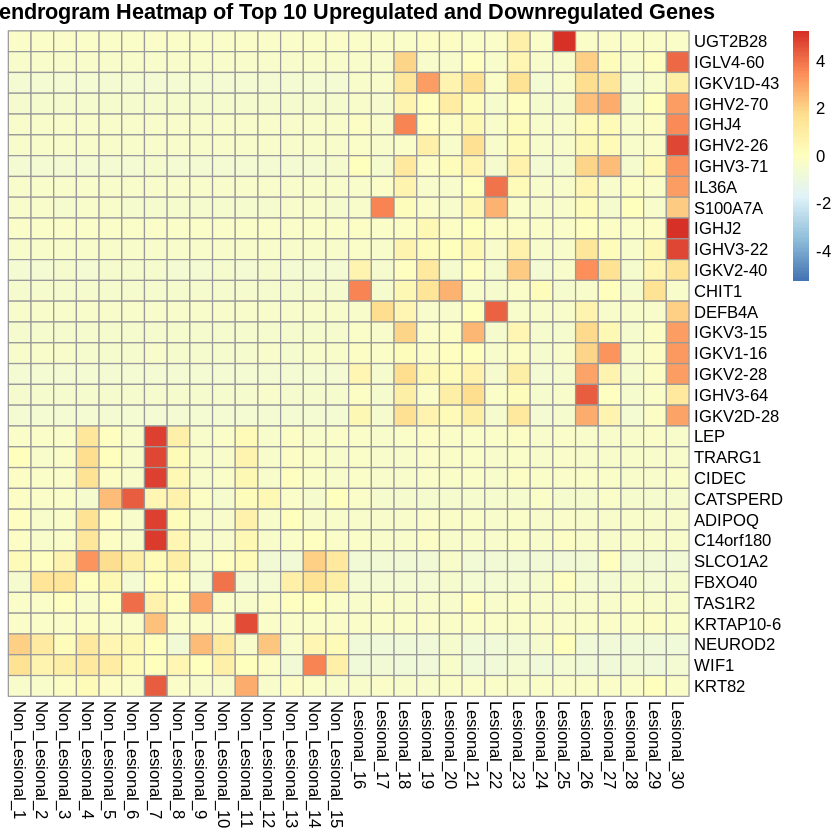

In [ ]:
# Extract the top 10 upregulated and top 10 downregulated genes
top_upregulated <- res[order(res$log2FoldChange, decreasing = TRUE), ][1:20, ]
top_downregulated <- res[order(res$log2FoldChange, decreasing = FALSE), ][1:20, ]

# Combine top upregulated and downregulated genes
top_genes <- rbind(top_upregulated, top_downregulated)

# Get the Ensembl IDs of the top genes
top_gene_ensembl_ids <- rownames(top_genes)

# Convert Ensembl IDs to gene symbols
top_gene_symbols <- mapIds(org.Hs.eg.db,
                            keys = top_gene_ensembl_ids,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals = "first")

# Remove any NA values (genes without symbols)
top_gene_symbols <- top_gene_symbols[!is.na(top_gene_symbols)]

# Subset the expression data for the top genes
top_genes_expr <- data[names(top_gene_symbols), ]

# Create custom sample names
original_colnames <- colnames(data)
custom_sample_names <- ifelse(grepl("Non_Lesional", original_colnames),
                              paste0("Non_Lesional_", seq_along(grep("Non_Lesional", original_colnames))),
                              paste0("Lesional_", seq_along(grep("Lesional", original_colnames))))
colnames(top_genes_expr) <- custom_sample_names # Assign custom names


# Create the heatmap with gene symbols on the x-axis
pheatmap(top_genes_expr,
         scale = "row",
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         show_rownames = TRUE,
         show_colnames = TRUE,
         main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = custom_sample_names, # Custom sample names for columns
         labels_row = top_gene_symbols)   # Gene symbols for rows

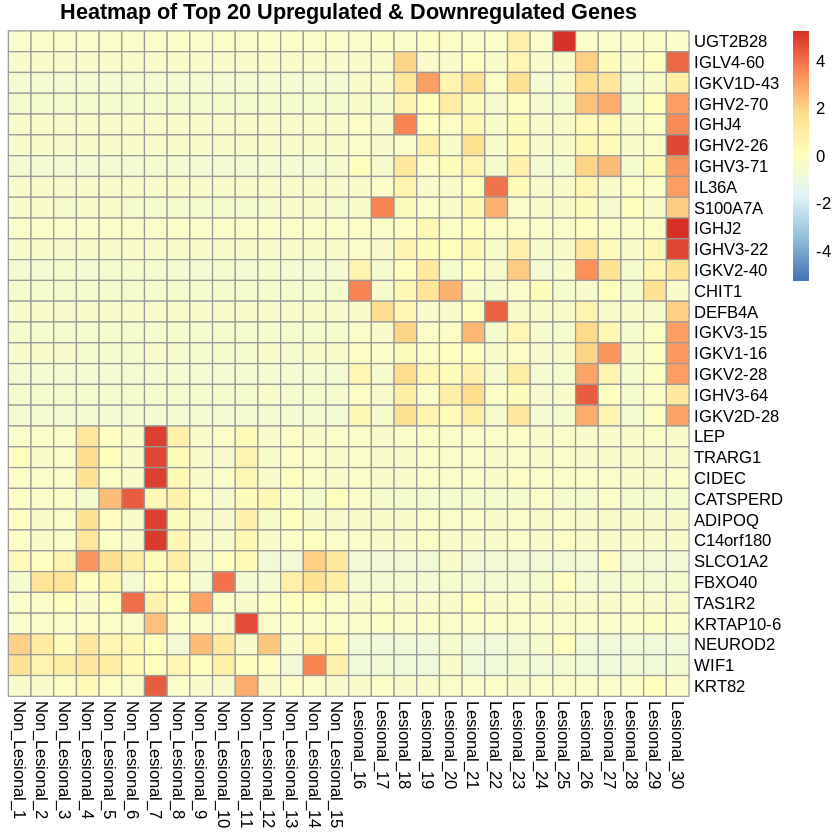

In [ ]:
library(pheatmap)
pheatmap <- pheatmap(top_genes_expr,
            scale = "row",              # Scale rows to center gene expression
            cluster_cols = FALSE,        # Enable column clustering (dendrogram)
            cluster_rows = FALSE,        # Enable row clustering (dendrogram)
            show_rownames = TRUE,       # Show gene symbols on y-axis
            show_colnames = TRUE,       # Show custom sample names on x-axis
            main = "Heatmap of Top 20 Upregulated & Downregulated Genes",
            labels_col = custom_sample_names,
            labels_row = top_gene_symbols)  # Use custom sample names for x-axis

In [ ]:
ggsave("pheatmap.png", plot = pheatmap, dpi = 300, width = 10, height = 8, units = "in")

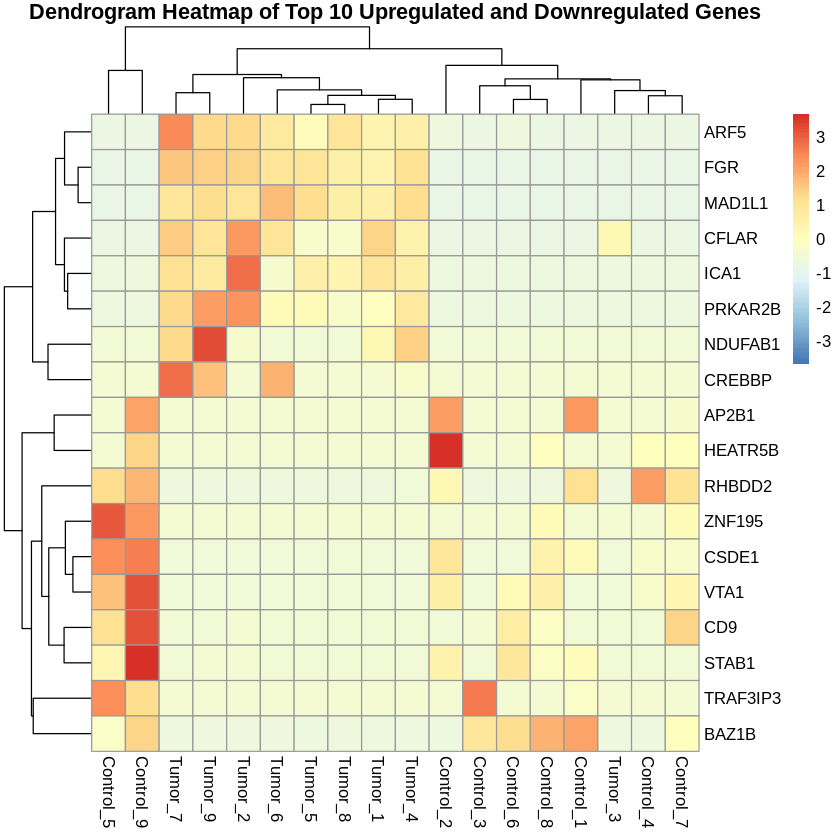

In [ ]:
library(pheatmap)
pheatmap(top_genes_expr,
         scale = "row",              # Scale rows to center gene expression
         cluster_cols = TRUE,        # Enable column clustering (dendrogram)
         cluster_rows = TRUE,        # Enable row clustering (dendrogram)
         show_rownames = TRUE,       # Show gene symbols on y-axis
         show_colnames = TRUE,       # Show custom sample names on x-axis
         main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = custom_sample_names,
         labels_row = gene_symbols)  # Use custom sample names for x-axis

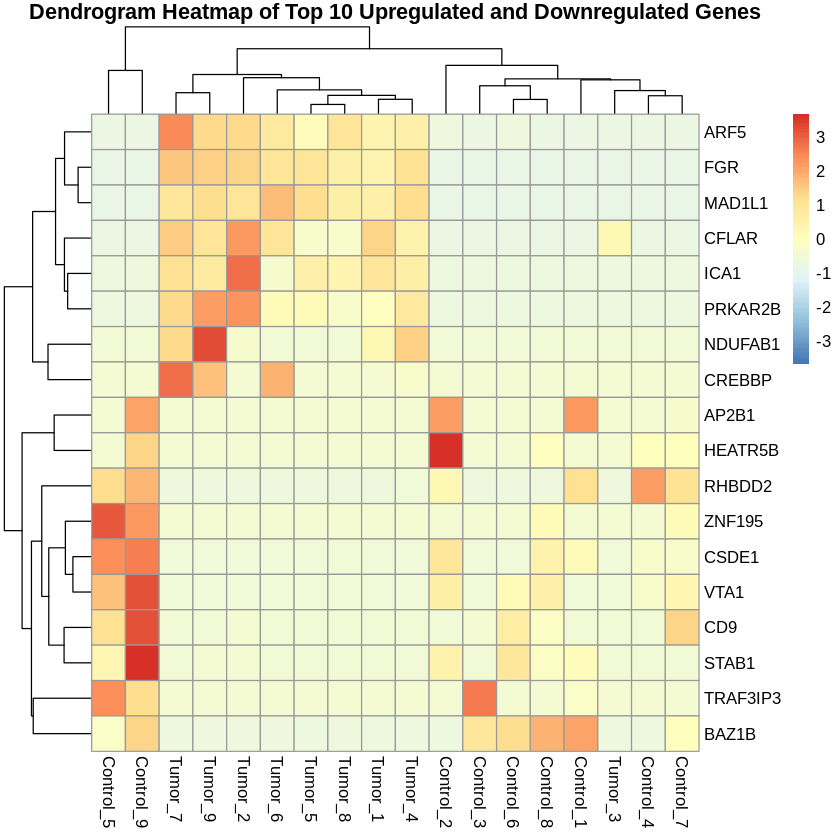

In [ ]:
library(pheatmap)

# Store the heatmap as an object
Dendrogram_Heatmap <- pheatmap(top_genes_expr,
                     scale = "row",              # Scale rows to center gene expression
                     cluster_cols = TRUE,        # Enable column clustering (dendrogram)
                     cluster_rows = TRUE,        # Enable row clustering (dendrogram)
                     show_rownames = TRUE,       # Show gene symbols on y-axis
                     show_colnames = TRUE,       # Show custom sample names on x-axis
                     main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
                     labels_col = custom_sample_names,
                     labels_row = gene_symbols)
